<a href="https://colab.research.google.com/github/rojre1979/AI_References_2022/blob/main/SP902_Tabular_Capstone(Robert_Judal_Regalado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.tabular.all import *

In [71]:
df = pd.read_csv("/content/SP902-Tabular-Capstone.csv")
df['Label'] = df['Clicked on Ad'].astype(str)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Label
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0


In [72]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [73]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
Label                        object
dtype: object

In [74]:
dls = TabularDataLoaders.from_df(df, y_names="Label",
    cat_names = ['Ad Topic Line', 'City', 'Country'],
    cont_names = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage'],
    procs = [Categorify, FillMissing, Normalize],
    valid_pct=0.2
    )

In [75]:
dls.show_batch()

,Ad Topic Line,City,Country,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Label
0,Self-enabling optimal initiative,West Jessicahaven,Mauritania,53.299999,34.0,44893.711237,111.940000,1
1,Devolved zero administration intranet,Suzannetown,South Africa,62.330002,43.0,68787.093408,127.110003,1
2,Innovative maximized groupware,East Heatherside,New Zealand,57.200001,42.0,57739.031200,110.660003,1
3,Diverse multi-tasking parallelism,New Tinamouth,Brunei Darussalam,76.059997,23.0,58633.628714,201.039994,0
4,Synergistic discrete middleware,Whitneyfort,Sweden,79.599999,28.0,56570.058531,227.369998,0
5,Total user-facing hierarchy,South Vincentchester,United Kingdom,60.070000,42.0,65963.367025,120.749998,1
6,Enterprise-wide tangible model,North Katie,Tonga,35.790001,44.0,33813.078494,165.619995,1
7,Intuitive fresh-thinking moderator,Sellerstown,Ireland,81.459999,29.0,51636.121140,231.539994,0
8,Upgradable heuristic system engine,South Lisa,Turkey,59.130001,44.0,49525.370970,106.039999,1
9,Fundamental tangible moratorium,New Taylorburgh,Austria,68.720001,27.0,66861.671486,225.970003,0


In [76]:
precision = Precision()
recall = Recall()
learn = tabular_learner(dls, metrics=[error_rate, accuracy, precision, recall])

In [77]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,time
0,0.298782,0.621024,0.380000,0.620000,0.539394,1.000000,00:00


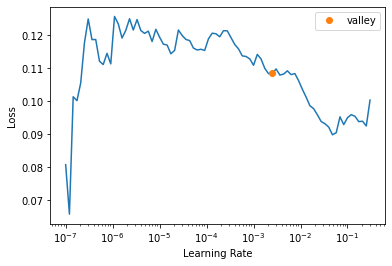

In [78]:
best_learning_rate = learn.lr_find()

In [79]:
learn.fine_tune(4, best_learning_rate[0])

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,time
0,0.119199,0.472623,0.110000,0.890000,0.807339,0.988764,00:00


epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,time
0,0.074078,0.304095,0.075000,0.925000,0.885417,0.955056,00:00
1,0.063509,0.187218,0.050000,0.950000,0.943820,0.943820,00:00
2,0.046783,0.122032,0.035000,0.965000,0.976744,0.943820,00:00
3,0.035663,0.104645,0.040000,0.960000,0.976471,0.932584,00:00


In [80]:
learn.show_results()

,Ad Topic Line,City,Country,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Label,Label_pred
0,47.0,727.0,54.0,0.308999,1.167967,-1.373961,-1.509759,1.0,1.0
1,603.0,291.0,223.0,-0.905680,0.251914,0.969363,-0.997887,1.0,1.0
2,291.0,272.0,136.0,0.210239,0.595434,0.764842,1.738078,0.0,0.0
3,533.0,480.0,233.0,-0.462206,0.137408,-1.305966,-1.587721,1.0,1.0
4,870.0,22.0,227.0,0.984589,-0.664138,-0.332861,1.414636,0.0,0.0
5,55.0,955.0,123.0,-0.616950,0.137408,1.522296,-0.554659,1.0,1.0
6,37.0,572.0,149.0,0.822296,-0.435125,0.596534,1.340083,0.0,0.0
7,459.0,478.0,171.0,0.754989,-1.007657,0.685017,0.801845,0.0,0.0
8,691.0,941.0,81.0,0.956282,-1.122164,0.451039,0.628418,0.0,0.0


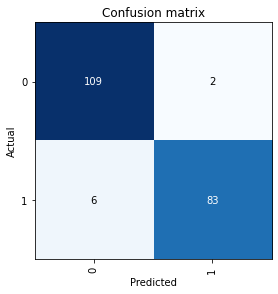

In [83]:
classif_interp = ClassificationInterpretation.from_learner(learn)
classif_interp.plot_confusion_matrix()

# Shallow Learning

In [55]:
from sklearn.model_selection import train_test_split


In [56]:
X_num = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']]
X_cat = df[['Ad Topic Line', 'City', 'Country']]

In [57]:
X_cat_dum = pd.get_dummies(X_cat)
X_cat_dum

,Ad Topic Line_Adaptive 24hour Graphic Interface,Ad Topic Line_Adaptive asynchronous attitude,Ad Topic Line_Adaptive context-sensitive application,Ad Topic Line_Adaptive contextually-based methodology,Ad Topic Line_Adaptive demand-driven knowledgebase,Ad Topic Line_Adaptive uniform capability,Ad Topic Line_Advanced 24/7 productivity,Ad Topic Line_Advanced 5thgeneration capability,Ad Topic Line_Advanced didactic conglomeration,Ad Topic Line_Advanced disintermediate data-warehouse,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X = pd.concat([X_num, X_cat_dum], axis=1)

In [59]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line_Adaptive 24hour Graphic Interface,Ad Topic Line_Adaptive asynchronous attitude,Ad Topic Line_Adaptive context-sensitive application,Ad Topic Line_Adaptive contextually-based methodology,Ad Topic Line_Adaptive demand-driven knowledgebase,Ad Topic Line_Adaptive uniform capability,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,51.30,45,67782.17,134.42,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,51.63,51,42415.72,120.37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,55.55,19,41920.79,187.95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
y = df['Label']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [63]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [64]:
model.score(X_test, y_test)

0.945

In [65]:
from sklearn.metrics import classification_report

In [66]:
y_pred = model.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       191
           1       0.98      0.91      0.95       209

    accuracy                           0.94       400
   macro avg       0.95      0.95      0.94       400
weighted avg       0.95      0.94      0.95       400

